In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [75]:
# Code starts here
Train=pd.read_csv('train.csv')
Train

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.300,0,0,3,2632.99200,1
1,990,26,0,19.800,1,0,3,3378.91000,0
2,123,44,1,31.350,1,1,0,39556.49450,1
3,184,44,1,30.690,2,0,2,7731.42710,0
4,1167,29,0,24.600,2,0,3,4529.47700,0
...,...,...,...,...,...,...,...,...,...
1065,335,64,1,34.500,0,0,3,13822.80300,1
1066,618,19,0,33.110,0,1,2,34439.85590,1
1067,227,58,0,41.910,0,0,2,24227.33724,1
1068,713,20,1,40.470,0,0,0,1984.45330,1


In [76]:
# Read the test data
Test = pd.read_csv('test.csv')
Test.head(5)

,Id,age,sex,bmi,children,smoker,region,charges
0,811,33,0,42.940,3,0,1,6360.99360
1,973,19,0,40.500,0,0,3,1759.33800
2,308,58,1,34.865,0,0,0,11944.59435
3,845,60,0,32.450,0,1,2,45008.95550
4,1050,44,0,36.955,1,0,1,8023.13545


In [77]:
Train.shape

(1070, 9)

In [78]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   age             1070 non-null   int64  
 2   sex             1070 non-null   int64  
 3   bmi             1070 non-null   float64
 4   children        1070 non-null   int64  
 5   smoker          1070 non-null   int64  
 6   region          1070 non-null   int64  
 7   charges         1070 non-null   float64
 8   insuranceclaim  1070 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 75.4 KB


In [79]:
train=Train.drop('Id',axis=1)
# Applying same transformation on test
test=Test.drop('Id',axis=1)
test

,age,sex,bmi,children,smoker,region,charges
0,33,0,42.940,3,0,1,6360.99360
1,19,0,40.500,0,0,3,1759.33800
2,58,1,34.865,0,0,0,11944.59435
3,60,0,32.450,0,1,2,45008.95550
4,44,0,36.955,1,0,1,8023.13545
...,...,...,...,...,...,...,...
263,42,1,30.000,0,1,3,22144.03200
264,36,1,28.880,3,0,0,6748.59120
265,20,0,33.000,0,0,2,1880.07000
266,19,0,24.510,1,0,1,2709.11190


In [80]:
col=train.columns.to_list()
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region',
 'charges',
 'insuranceclaim']

In [81]:
train.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.030841,0.495327,30.490196,1.128037,0.203738,1.516822,13262.895208,0.568224
std,13.951271,0.500212,6.109707,1.211675,0.402965,1.110035,12125.948212,0.495555
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.030000,0.000000,0.000000,1.000000,4651.971162,0.000000
50%,39.000000,0.000000,30.140000,1.000000,0.000000,2.000000,9341.303300,1.000000
75%,51.000000,1.000000,34.320000,2.000000,0.000000,2.000000,17117.636460,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

In [82]:
# Code starts here

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>,
        <AxesSubplot:title={'center':'insuranceclaim'}>, <AxesSubplot:>]],
      dtype=object)

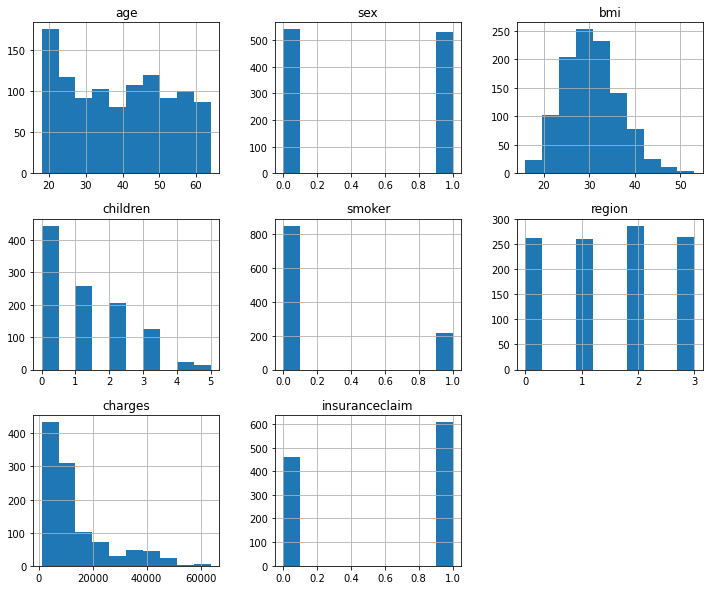

In [83]:
train.hist(figsize=(12,10))

Text(0, 0.5, 'Y')

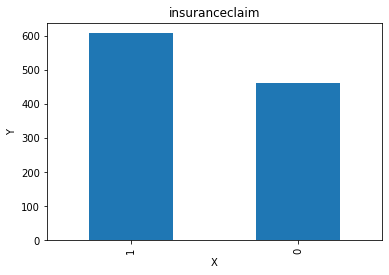

In [84]:
# Checking for the class distribution of the target
train['insuranceclaim'].value_counts().plot(kind='bar')
plt.title('insuranceclaim')
plt.xlabel('X')
plt.ylabel('Y')

In [85]:
print('Skewness for different features is as shown below:')
print(train.skew())

Skewness for different features is as shown below:
age               0.071193
sex               0.018719
bmi               0.357077
children          0.900842
smoker            1.473163
region           -0.036303
charges           1.521464
insuranceclaim   -0.275861
dtype: float64


In [124]:
train['charges'] = np.log1p(train['charges'])
test['charges']= np.log1p(test['charges'])

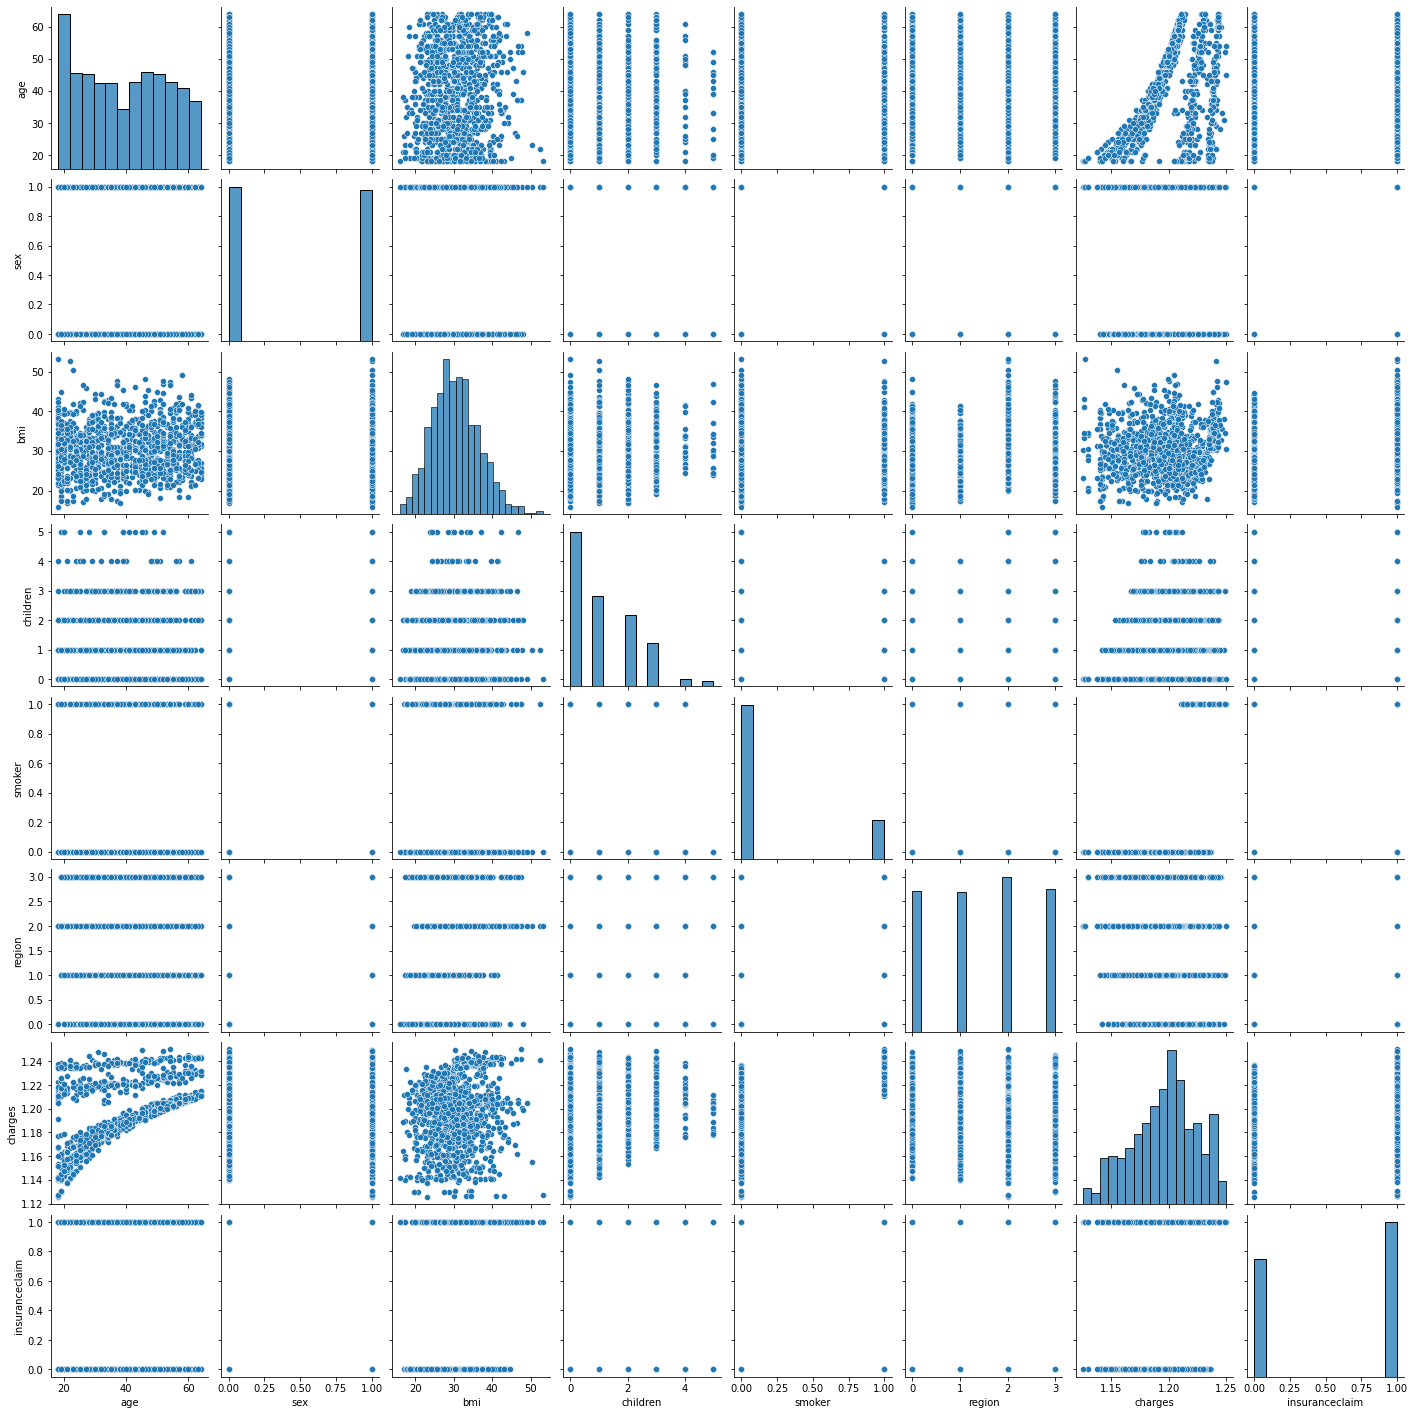

In [125]:
sns.pairplot(train)

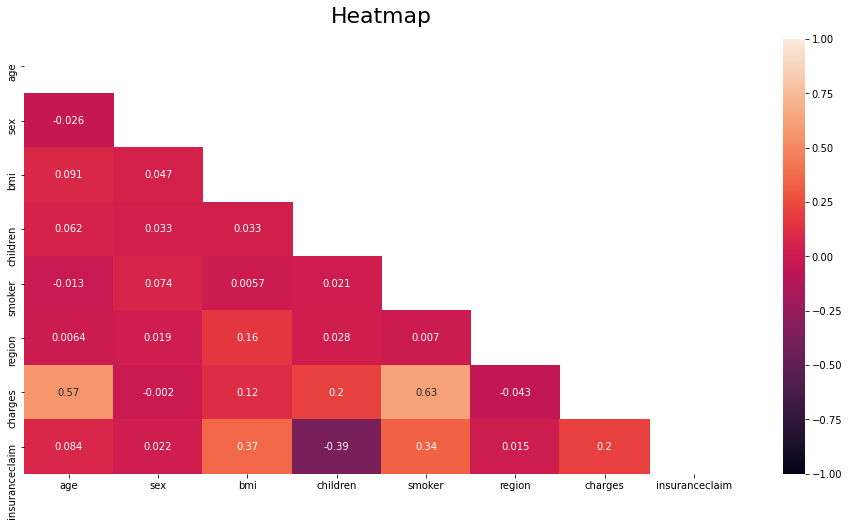

In [126]:
# check the correlation of X_train
#relation = train.corr()
#sns.heatmap(relation)

plt.figure(figsize=(16, 8))

mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))

heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':22}, pad=16);


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [127]:
# Code starts here
# Feachers:X and Target:y 

X=train.drop('insuranceclaim', axis=1)
y=train['insuranceclaim']

In [128]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=6)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 7)
(214, 7)
(856,)
(214,)


In [129]:
X_train

,age,sex,bmi,children,smoker,region,charges
378,22,0,28.050,0,0,2,1.150761
248,30,1,44.220,2,0,2,1.174433
719,29,1,27.940,0,0,2,1.160938
434,18,1,21.470,0,0,0,1.142001
973,62,1,30.875,3,1,1,1.242429
...,...,...,...,...,...,...,...
335,18,1,29.370,1,0,2,1.142376
618,38,1,28.270,1,0,2,1.182582
227,63,1,39.800,3,0,3,1.212956
713,32,0,29.590,1,0,2,1.176642


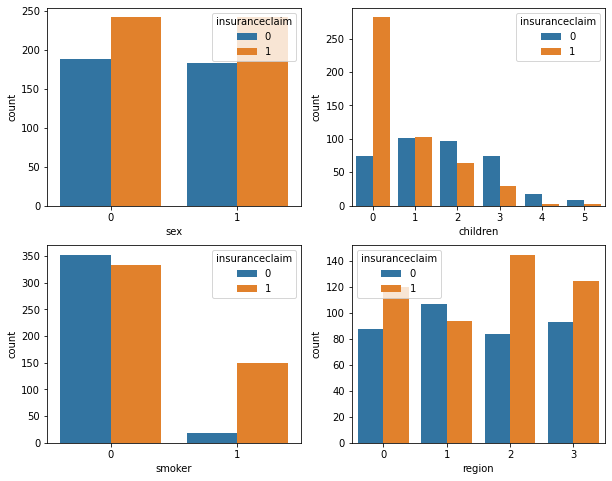

In [131]:
cols=['sex', 'children','smoker', 'region']
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,8))

for i in range(0,2):
    for j in range(0,2):
        col=cols[2*i+j]
        sns.countplot(x=X_train[col], hue=y_train, ax=axes[i,j])

In [133]:
# instantiate logistic regression model
lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)

# make predictions 
y_pred = lr.predict(X_test)

print('ROC_AUC_SCORE is {}'.format(roc_auc_score(y_test,y_pred)))
print('roc_auc_score:',roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

ROC_AUC_SCORE is 0.8738351254480288
roc_auc_score: 0.9094982078853047


0.9094982078853047


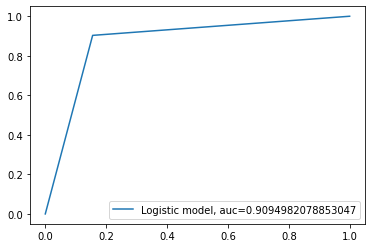

In [134]:
#visualize and Check the performance of the classifier using roc auc curve.

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
print(roc_auc)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [135]:
params = {'C':[0.05,0.01, 0.2,0.5,3,5]}

# grid search on logistic regression
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)

y_pred_proba = grid.predict(X_test)
print('ROC_AUC_SCORE is {}'.format(roc_auc_score(y_test,y_pred_proba)))

print('roc_auc_score:',roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1]))

ROC_AUC_SCORE is 0.8738351254480288
roc_auc_score: 0.9113799283154123


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [137]:
# Storing the id from the test file
Id = Test['Id']

# Predict on the test data
y_pred_test = grid.predict(test)

final_submission = pd.DataFrame({'Id':Id,'insuranceclaim':y_pred_test})
final_submission = final_submission.astype(int)

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

In [138]:
final_submission

,Id,insuranceclaim
0,811,0
1,973,0
2,308,0
3,845,0
4,1050,0
...,...,...
263,461,0
264,626,0
265,614,0
266,636,0
